In [34]:
import pandas as pd

X = pd.read_csv("preprocessed_apartment_rentals.csv")

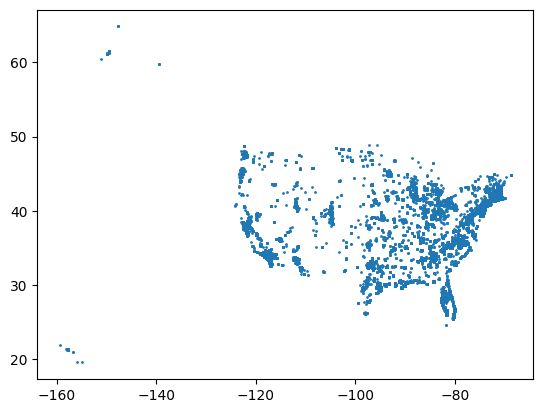

In [35]:
import matplotlib.pyplot as plt

plt.scatter(X["longitude"], X["latitude"], s=1)

[ 1 19  2 ...  1 15  1]


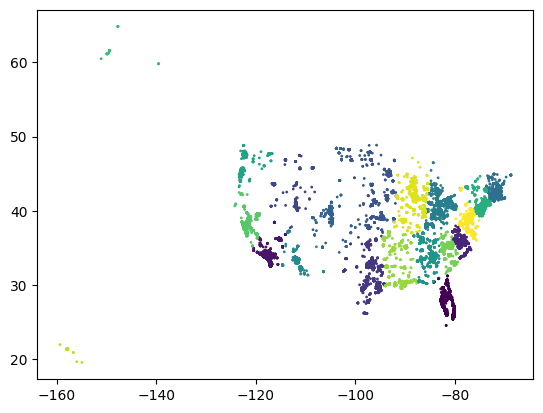

In [36]:
from sklearn.cluster import KMeans
import numpy as np

kmeans = KMeans(n_clusters=20)
kmeans.fit(X[["longitude", "latitude"]])
clusters = kmeans.labels_
print(kmeans.labels_)
plt.scatter(X["longitude"], X["latitude"], c=clusters, s=1)

In [37]:
one_hot_clusters = pd.get_dummies(clusters, prefix="cluster").astype(int)
X = pd.concat([X, one_hot_clusters], axis=1)
X.to_csv("preprocessed_apartment_rentals_clusters.csv", index=False)
